<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev6/S13/EVA4_S13_Solution_AssignmentB_YoloV3_Custom_Dataset_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVA4 Session 13 YoloV3 Custome Dataset
- Training Custom Dataset on Colab for YoloV3
- Refer to this Colab File: LINK (Links to an external site.)
- Refer to this GitHub Repo (Links to an external site.)
- Collect a dataset of 500 images and annotate them. Please select a class for which you can find a YouTube video as well. Steps are explained in the readme.md file on GitHub.
- Once done:
  1. Download (Links to an external site.) a very small (~10-30sec) video from youtube which shows your class. 
  2. Use ffmpeg (Links to an external site.) to extract frames from the video. 
  3. Upload on your drive (alternatively you could be doing all of this on your drive to save upload time)
  4. Inter on these images using detect.py file. **Modify** detect.py file if your file names do not match the ones mentioned on GitHub. 
`python detect.py --conf-thres 0.3 --output output_folder_name`
  5. Use ffmpeg (Links to an external site.) to convert the files in your output folder to video
  6. Upload the video to YouTube. 
  7. Share the link to your GitHub project with the steps as mentioned above
  8. Share the link of your YouTube video
  9. Share the link of your YouTube video on LinkedIn, Instagram, etc! You have no idea how much you'd love people complimenting you! 

## 1. Loading libraries/Yolo cfg/Weight files

In [0]:
# Load modules/models from EVA course and YoloV3 folder
!git clone -b rev6 https://github.com/sujitojha1/EVA4 -q --quiet
!mkdir YoloV3
!mv EVA4/S13/* ./YoloV3
!mkdir ./YoloV3/weights
!wget -q https://github.com/sujitojha1/EVA4/releases/download/yolo/weights.zip
!unzip -q weights.zip -d YoloV3/weights
!rm -rf EVA4
!rm weights.zip

In [2]:
# Loading libraries
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [3]:
# Print the content
ls

sample_data/  YoloV3/


In [4]:
# Change the directory
cd YoloV3/

/content/YoloV3


In [5]:
!ls

 cfg					  room_ser.jpg
 coco.names				  test_batch0.png
 data					  test.py
 detect.py				  ting
 EVA4_S13_Solution_AssignmentA_V1.ipynb   train_batch0.png
 models.py				  train.py
 output					 'ubdivisions=1'
 README.md				  utils
 results.json				  weights
 results.png				  yolo_object_detection.py
 results.txt				  yolov3.cfg


## 2. Load pre-trained weight & then retrain on small coco data

In [6]:
# Loading pre-trained
#!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave
!python train.py --data data/smalcoco/smalcoco.data --batch 10 --cache --epochs 25 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=25, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-04-26 00:07:22.375189: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 6517.45it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 112.32it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 7255.95it

## 3. Retraining to Custom dataset

In [7]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave
#python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-04-26 00:09:20.582727: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (462 found, 0 missing, 0 empty, 0 duplicate, for 462 images): 100% 462/462 [00:00<00:00, 9219.48it/s]
Caching images (0.2GB): 100% 462/462 [00:04<00:00, 106.95it/s]
Reading image shapes: 100% 51/51 [00:00<00:00, 4345.37it/s]
Caching labels (51 found, 0 missing, 0 

## 4. Predicting on new dataset

In [8]:
#!python detect.py --conf-thres 0.1 --output out_out
!python detect.py --conf-thres 0.1 --source data/customdata/youtube_images --output data/customdata/youtube_output

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='data/customdata/youtube_output', save_txt=False, source='data/customdata/youtube_images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/831 data/customdata/youtube_images/image_set1_1440.jpg: 256x512 1 Kung Fu Pandas, Done. (0.030s)
image 2/831 data/customdata/youtube_images/image_set1_1441.jpg: 256x512 1 Kung Fu Pandas, Done. (0.028s)
image 3/831 data/customdata/youtube_images/image_set1_1442.jpg: 256x512 1 Kung Fu Pandas, Done. (0.028s)
image 4/831 data/customdata/youtube_images/image_set1_1443.jpg: 256x512 1 Kung Fu Pandas, Done. (0.027s)
image 5/831 data/customdata/youtube_images/image_set1_1444.jpg: 256x512 1 Ku

## 5. Plotting results

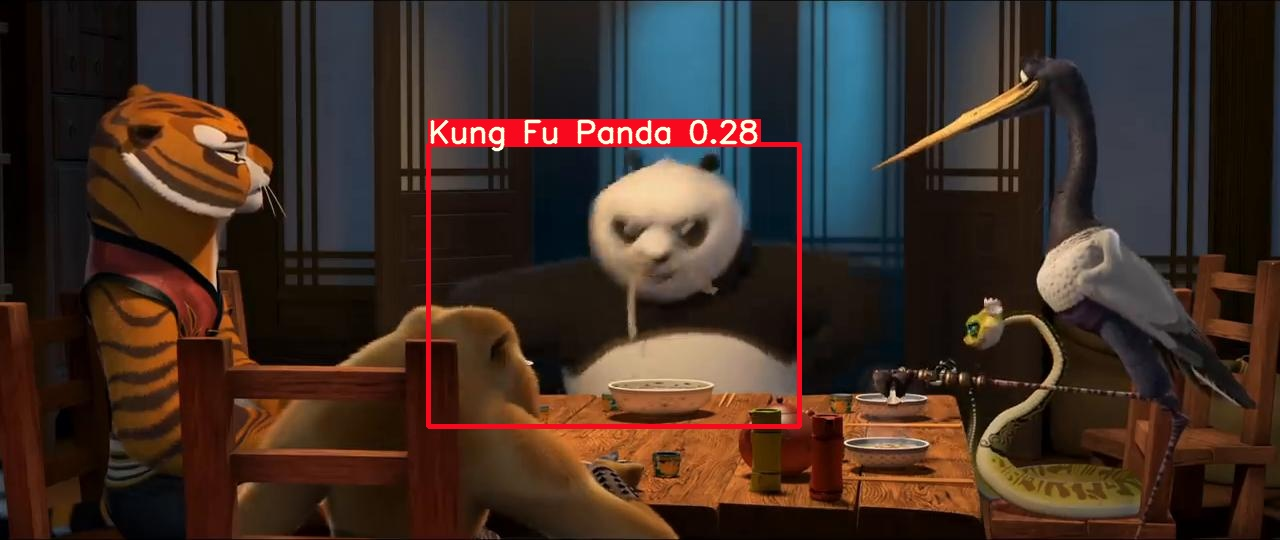

In [16]:
Image(filename='data/customdata/youtube_output/image_set1_1859.jpg', width=600)

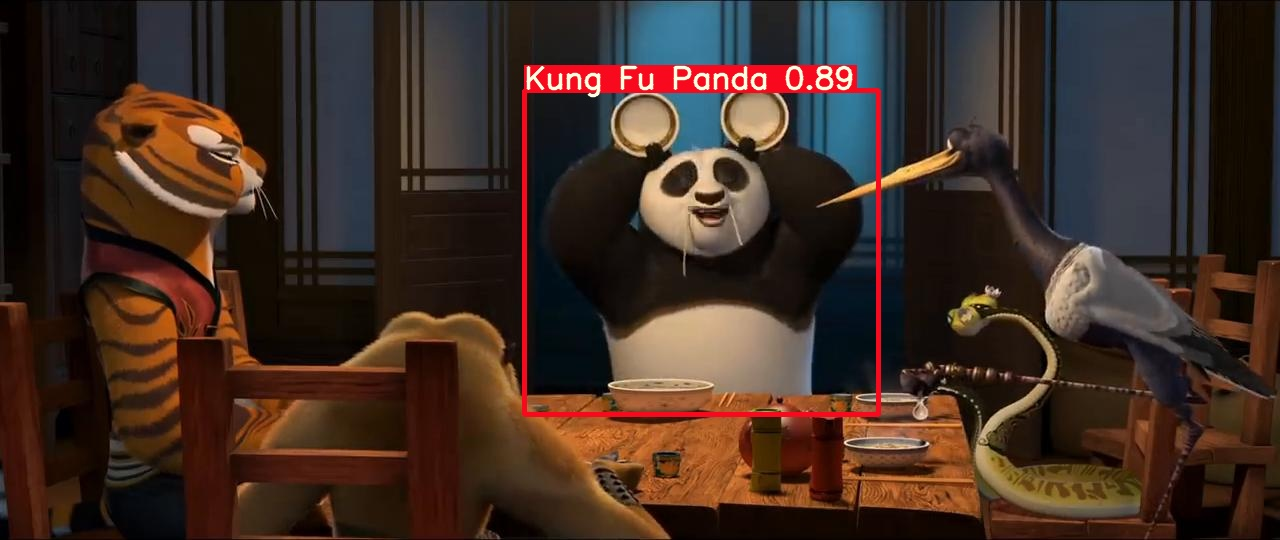

In [17]:
Image(filename='data/customdata/youtube_output/image_set1_1902.jpg', width=600)

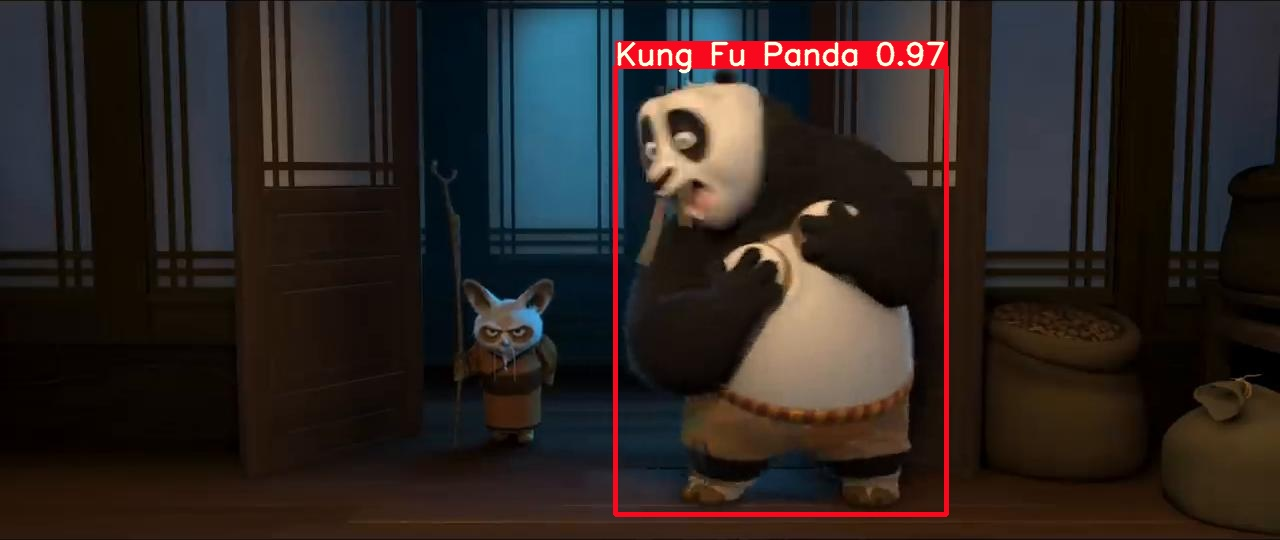

In [18]:
Image(filename='data/customdata/youtube_output/image_set1_2250.jpg', width=600)

In [0]:
!zip -r -q download.zip data/customdata/youtube_output